# Code for finetuning basemodel

In [8]:
%run setup.ipynb

In [2]:
epochs = 50
model, info = load_function("basemodel.tar")
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

/Users/athallenberg/miniconda3/envs/dm/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
unfreeze_layer3(model)
unfreeze_layer4(model)
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/50
----------
Train Loss: 0.0942 Acc: 0.9952
Val Loss: 0.1441 Acc: 0.9904
Epoch time 2m 57s
----------

Epoch 2/50
----------
Train Loss: 0.0766 Acc: 0.9964
Val Loss: 0.1277 Acc: 0.9808
Epoch time 2m 56s
----------

Epoch 3/50
----------
Train Loss: 0.0636 Acc: 0.9952
Val Loss: 0.1276 Acc: 0.9712
Epoch time 2m 58s
----------

Epoch 4/50
----------
Train Loss: 0.0659 Acc: 0.9988
Val Loss: 0.1252 Acc: 0.9808
Epoch time 2m 56s
----------

Epoch 5/50
----------
Train Loss: 0.0538 Acc: 0.9988
Val Loss: 0.0988 Acc: 0.9808
Epoch time 2m 59s
----------

Epoch 6/50
----------
Train Loss: 0.0529 Acc: 0.9952
Val Loss: 0.1073 Acc: 0.9712
Epoch time 2m 58s
----------

Epoch 7/50
----------
Train Loss: 0.0485 Acc: 0.9988
Val Loss: 0.0979 Acc: 0.9904
Epoch time 2m 56s
----------

Epoch 8/50
----------
Train Loss: 0.0430 Acc: 0.9976
Val Loss: 0.0861 Acc: 0.9904
Epoch time 2m 56s
----------

Epoch 9/50
----------
Train Loss: 0.0382 Acc: 0.9988
Val Loss: 0.0953 Acc: 0.9712
Epoch time 2m 57s
----

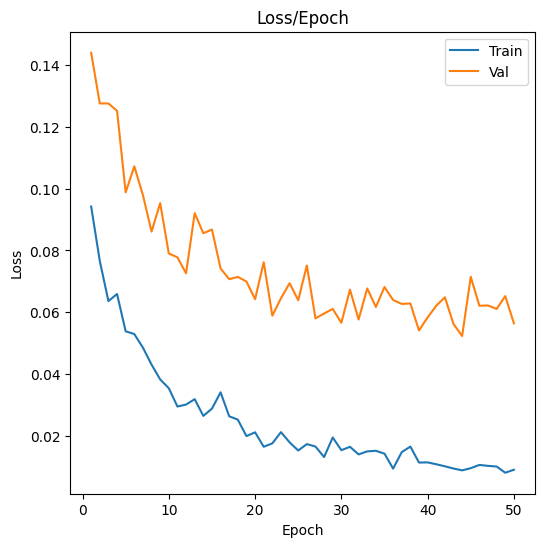

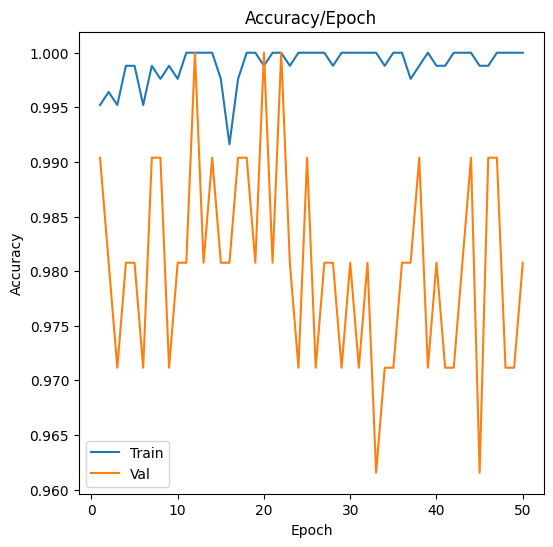

In [4]:
plot_loss(info["train_loss"], info["val_loss"], ["Train", "Val"])
plot_accuracies(info["train_acc"], info["val_acc"], ["Train", "Val"])

Accuracy:  97.14285714285714
              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.83      1.00      0.91        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.80      0.89        15
       robin       1.00      1.00      1.00        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.97       105
   macro avg       0.98      0.97      0.97       105
weighted avg       0.98      0.97      0.97       105

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  3  0 12  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

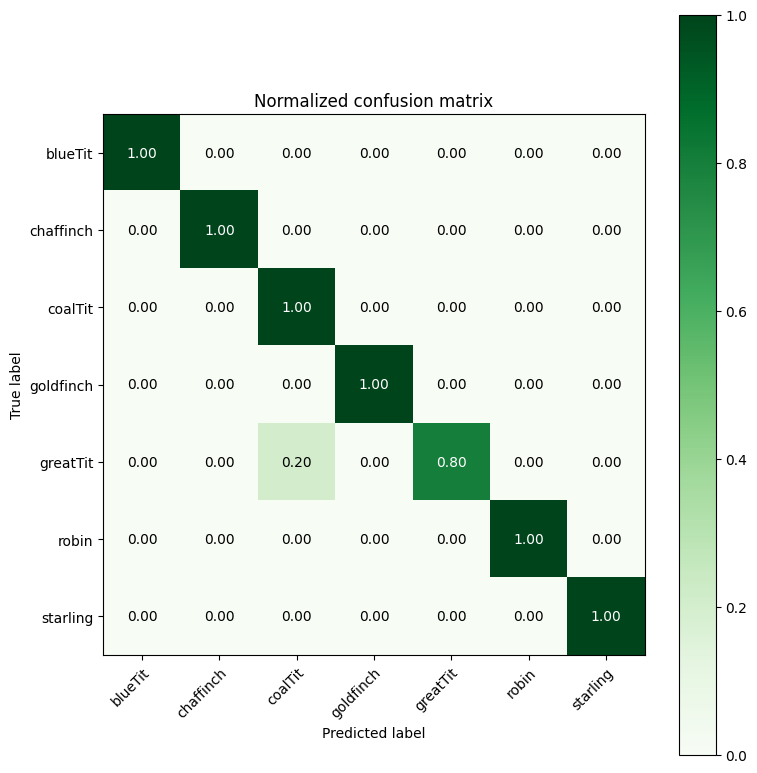

In [5]:
truel, predl = labels_and_predictions(dataloader_test, model, device)
print("Accuracy: ", (np.sum(predl==truel)/predl.size * 100))
print(classification_report(truel, predl, target_names=class_labels))
plot_confusion_matrix(truel, predl, class_labels, normalize=True)


[[ 244  284   47  228  499   10  766]
 [ 209 1262  114  910   69  137  851]
 [ 216  256  275  726  225    7  141]
 [   4   54   16 1871   43   10    2]
 [ 127  222  107  264  641   52  620]
 [  11  114    0   76   20  277  930]
 [  45  308  106   87   39   41 1516]]
Accuracy 40.36076662908681


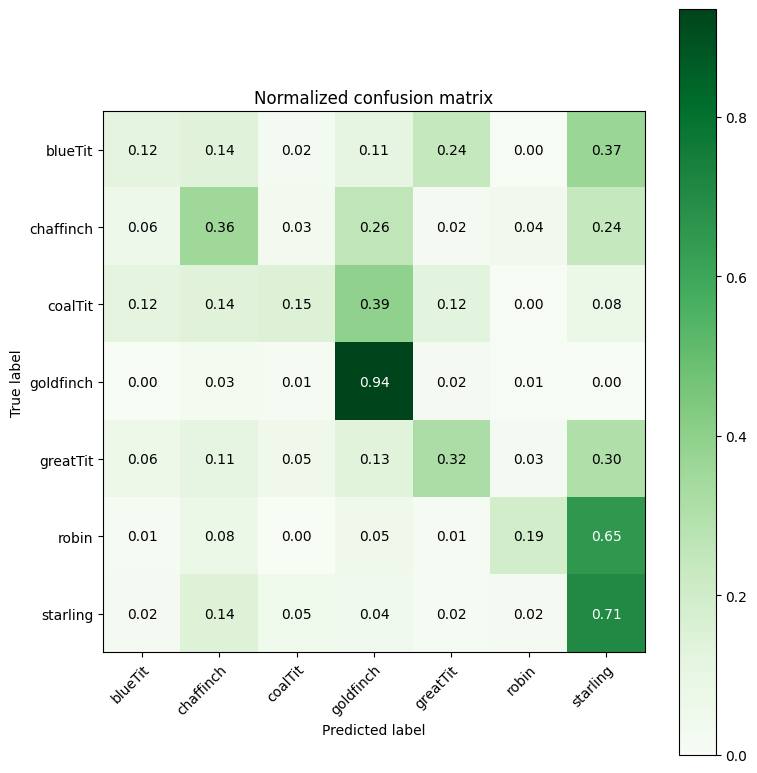

In [10]:
truel, predl = labels_and_predictions(dataloader_feeder, model, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))